## ***COVID-19 RADIOGRAPHY DATABASE***






\#IMPORT IMPORTANT LIBRARIES AnD PAcKAGES

In [ ]:
# Import necessary libraries
import pandas as pd                # For data manipulation and analysis
import numpy as np                 # For numerical operations
import matplotlib.pyplot as plt    # For plotting and data visualization
import seaborn as sns              # For enhanced data visualization
import tensorflow as tf            # For building and training neural networks
import os                          # For handling directory and file operations
import cv2                         # For image processing and computer vision tasks

# IMPORT KAGGLE DATASET

In [ ]:
# Set Kaggle API credentials as environment variables
os.environ['KAGGLE_USERNAME'] = 'ZUNAIRA_NUREEN'
os.environ['KAGGLE_KEY']='15b88c655e89e3e0d7a0e6c4396182d6'

In [ ]:
# Download the COVID-19 Radiography Database dataset from Kaggle
!kaggle datasets download tawsifurrahman/covid19-radiography-database

Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database
License(s): copyright-authors
 98% 759M/778M [00:03<00:00, 197MB/s]
100% 778M/778M [00:04<00:00, 202MB/s]


#UNZIP DATASETS

In [ ]:
!unzip /content/covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [ ]:
# List and print the files in the COVID directory within the dataset
print(os.listdir('/content/COVID-19_Radiography_Dataset/COVID'))
# Print the number of files in the COVID directory
print(len(os.listdir('/content/COVID-19_Radiography_Dataset/COVID')))

# List and print the files in the Normal directory within the dataset
print(os.listdir('/content/COVID-19_Radiography_Dataset/Normal'))
# Print the number of files in the Normal directory
print(len(os.listdir('/content/COVID-19_Radiography_Dataset/Normal')))

['masks', 'images']
2
['masks', 'images']
2


#PLOT IMAGES TO VISULIZEATION

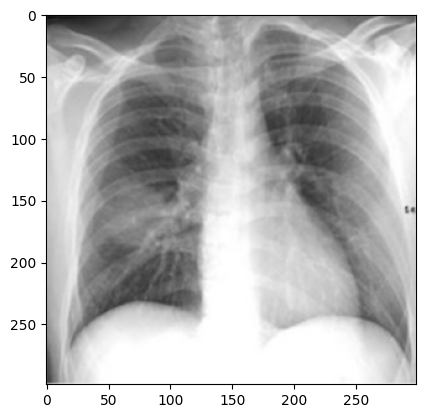

In [ ]:
# Read an image file from the specified path using OpenCV
image = cv2.imread('/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1002.png')
# Display the image using Matplotlib
plt.imshow(image)


#LOAD ALL THE IMAGES IN COLAB NOTEBOOK

In [ ]:
# Define a function to load images and assign labels
def loadimages(path,urls,target):
  images=[]   # Initialize an empty list to store images
  labels=[]   # Initialize an empty list to store labels

      # Iterate over the list of image filenames (URLs)
  for i in range(len(urls)):
    img_path = path + '/'+ urls[i]    # Construct the full path to the image
    img = cv2.imread(img_path)        # Load the image from the specified path
    images.append(img)                # Append the image to the images list
    labels.append(target)             # Append the target label to the labels list

  return images, labels


In [ ]:
# Define paths to the COVID and Normal image directories
covid_path='/content/COVID-19_Radiography_Dataset/COVID/images'
covid_urls =os.listdir(covid_path)

# Get a list of all image filenames in each directory
normal_path = '/content/COVID-19_Radiography_Dataset/Normal/images'  # List of COVID image filenames
normal_urls = os.listdir(normal_path)                                # List of Normal image filenames

# Load COVID images and assign them the label 1
covid_images,covid_target = loadimages(covid_path,covid_urls,1)
normal_images,normal_target=loadimages(normal_path,normal_urls,0)

In [ ]:
# Convert the list of COVID images to a NumPy array
covid_images = np.asarray(covid_images)
# Convert the list of Normal images to a NumPy array
normal_images = np.asarray(normal_images)

# IMAGES SHAPE

In [ ]:
# Check the shapes of the COVID and Normal image arrays
covid_images.shape,normal_images.shape

((3616, 299, 299, 3), (10192, 299, 299, 3))

# STACK ALL THE IMAGES IN DATASET TO TRAIN MODEL

In [ ]:
# Concatenate COVID and Normal images into a single NumPy array
data =np.r_[covid_images,normal_images]

In [ ]:
# Concatenate the target labels for COVID and Normal images into a single NumPy array
targets = np.r_[covid_target,normal_target]

In [ ]:
# Check the shapes of the targets and data arrays
targets.shape,data.shape

((13808,), (13808, 299, 299, 3))

#PREPROCESS DATASET

In [ ]:
# Normalize pixel values of the images to the range [0, 1]
data=data/255.0

In [ ]:
# Import the train_test_split function from scikit-learn for splitting datasets
from sklearn.model_selection import train_test_split

# Split the data and targets into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(data,targets,test_size=0.25,random_state=42)

#BUILDING CNN MODEL ARTITECHTURE

In [ ]:
# Import necessary modules from TensorFlow Keras for building neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
# Create a Sequential model for the CNN
model=Sequential([
      # First convolutional layer: 32 filters, 3x3 kernel size, ReLU activation
    Conv2D(32,(3,3),input_shape=(299,299,3),activation='relu'),
      # First max pooling layer to downsample the feature maps
    MaxPooling2D(pool_size=(2,2)),
      # Second convolutional layer: 32 filters, 3x3 kernel size, ReLU activation
    Conv2D(32,(3,3),activation='relu'),
      # Second max pooling layer
    MaxPooling2D(pool_size=(2,2)),
      # Third convolutional layer: 64 filters, 3x3 kernel size, ReLU activation
    Conv2D(64,(3,3),activation='relu'),
      # Third max pooling layer
    MaxPooling2D(pool_size=(2,2)),
      # Flatten the output from 2D to 1D
    Flatten(),
      # Fully connected layer with 128 neurons and ReLU activation
    Dense(128,activation='relu'),
      # add dropout layer to prevent overfitting
    Dropout(0.5)
      # Output layer with 1 neuron and sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and binary cross-entropy loss function
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Display the model's architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 148, 148, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 35, 35, 64)       

#TRAIN CNN MODEL

In [ ]:
# Train the CNN model on the training data
model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
324/324 [==============================] - 194s 594ms/step - loss: 0.3534 - accuracy: 0.8449 - val_loss: 0.2297 - val_accuracy: 0.9119
Epoch 2/10
324/324 [==============================] - 188s 581ms/step - loss: 0.2032 - accuracy: 0.9170 - val_loss: 0.2181 - val_accuracy: 0.9116
Epoch 3/10
324/324 [==============================] - 189s 585ms/step - loss: 0.1337 - accuracy: 0.9484 - val_loss: 0.1989 - val_accuracy: 0.9351
Epoch 4/10
324/324 [==============================] - 189s 583ms/step - loss: 0.0952 - accuracy: 0.9630 - val_loss: 0.1531 - val_accuracy: 0.9452
Epoch 5/10
324/324 [==============================] - 188s 581ms/step - loss: 0.0585 - accuracy: 0.9789 - val_loss: 0.2358 - val_accuracy: 0.9250
Epoch 6/10
324/324 [==============================] - 189s 584ms/step - loss: 0.0375 - accuracy: 0.9868 - val_loss: 0.1897 - val_accuracy: 0.9496
Epoch 7/10
324/324 [==============================] - 190s 587ms/step - loss: 0.0246 - accuracy: 0.9907 - val_loss: 0.2662 -

#PLOT TO VISULIZE RESULTS

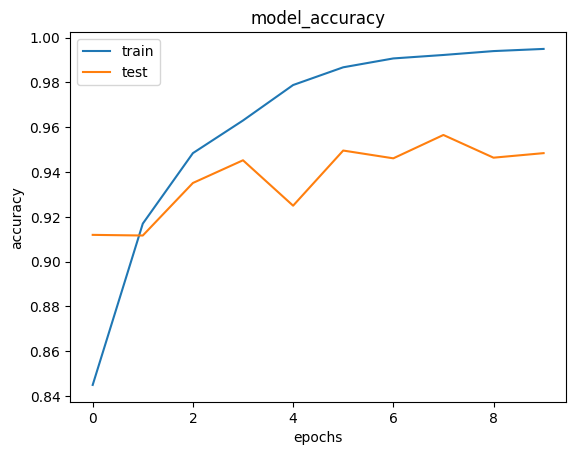

In [ ]:
# Plot the training and validation accuracy over epochs
plt.plot(model.history.history['accuracy'])       # Plot training accuracy
plt.plot(model.history.history['val_accuracy'])   # Plot validation accuracy

# Set the title and labels for the plot
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

# Add a legend to differentiate between training and validation accuracy
plt.legend(['train','test'],loc='upper left')

# Display the plot
plt.show()

#MODEL ACCURACY

In [ ]:
# Evaluate the model on the test data to determine its performance
accuracy=model.evaluate(x_test,y_test)

# Print the test accuracy
print('Test accuracy;',accuracy)

108/108 [==============================] - 12s 113ms/step - loss: 0.2779 - accuracy: 0.9484
Test accuracy; [0.2779291570186615, 0.9484356641769409]


In [ ]:
# Import the accuracy_score function from scikit-learn
from sklearn.metrics import accuracy_score
# Predict probabilities for the test dataset
y_pred_prob=model.predict(x_test)
# Convert probabilities to binary predictions based on a threshold of 0.5
y_pred=np.where(y_pred_prob>0.5,1,0)
# Calculate the accuracy score by comparing predicted values with actual labels
accuracy_score=accuracy_score(y_test,y_pred)
# Print the accuracy score
print('accuracy_score: {}'.format(accuracy_score))

108/108 [==============================] - 12s 113ms/step
accuracy_score: 0.9484356894553881
